In [1]:
import pandas as pd
import numpy as np
import os
import requests
import json
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import time


In [2]:
# a function to generate sin wave with given period(int) and number of periods(float)
def sin_wave(period, num_periods):
    x = np.arange(period * num_periods)
    y = np.sin(2 * np.pi * (x / period))
    return y

In [9]:
# 创建一个dataframe 有 date, value, text 三列
df = pd.DataFrame(columns=['date', 'value', 'text'])

# 生成一些sin wave 拥有递增的date
for i in range(1, 4):
    y = sin_wave(30, 3)
    y = y + np.random.normal(0, 0.3, len(y))
    df_tmp = pd.DataFrame({'date': pd.date_range('2020-01-01', periods=len(y), freq='min'), 'value': y})
    df_tmp['text'] = df_tmp['value']
    df = pd.concat([df, df_tmp], axis=0)

In [18]:
def gen_data(periods, numbers_of_periods, advance_alert_days=15):
    df = pd.DataFrame(columns=['date', 'Channel 1', 'text'])
    for i in range(len(periods)):
        y = sin_wave(periods[i], numbers_of_periods[i])
        # y = y + np.random.normal(0, 0.3, len(y))
        df_tmp = pd.DataFrame({'date': pd.date_range('2020-01-01', periods=len(y), freq='D'), 'Channel 1': y})
        # df_tmp['text'] = df_tmp['value']
        # set all the text as 'The time series goes as a steady sine wave'
        df_tmp['text'] = 'The channel 1 goes as a steady sine wave'
        # set the last 15 days' text as 'The period will be changed to 15 in i days'
        if i != len(periods)-1:
            l=len(df_tmp)
            for j in range(advance_alert_days):
                if l-j-1>=0:
                    df_tmp.loc[l-j-1, 'text'] = 'The period on channel 1 will be changed to {} in {} days'.format(periods[i+1], j+1)
                else:
                    break
        #         # df_tmp.loc[len(df_tmp)-15:, 'text'] = 'The period will be changed to {} in i days'.format(periods[i+1])
        # print(df_tmp)

        for j in range(min(5, len(df_tmp)//3)):
            df_tmp.loc[j, 'text'] = 'The channel 1 period is {} and goes steady'.format(periods[i])
        df = pd.concat([df, df_tmp], axis=0)
    # 使 index 也从0开始递增
    df.reset_index(drop=True, inplace=True)
    # 使 date 从 2020-01-01 开始递增
    df['date'] = pd.date_range('1800-01-01', periods=len(df), freq='min')

    return df

In [14]:
# generage 10 random integers between 10 and 100
periods = np.random.randint(10, 100, 10)
periods

array([24, 35, 35, 55, 75, 57, 60, 89, 49, 37])

In [19]:
a = gen_data(np.random.randint(2, 20, 500)*7, np.random.randint(2, 10, 500), 15)

<AxesSubplot:>

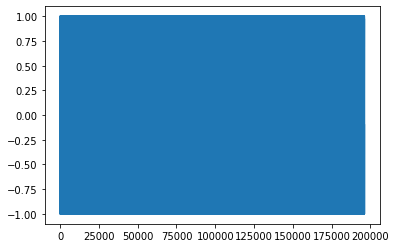

In [20]:
a['Channel 1'].plot()

In [21]:
a

,date,Channel 1,text
0,1800-01-01 00:00:00,0.000000,The channel 1 period is 84 and goes steady
1,1800-01-01 00:01:00,0.074730,The channel 1 period is 84 and goes steady
2,1800-01-01 00:02:00,0.149042,The channel 1 period is 84 and goes steady
3,1800-01-01 00:03:00,0.222521,The channel 1 period is 84 and goes steady
4,1800-01-01 00:04:00,0.294755,The channel 1 period is 84 and goes steady
...,...,...,...
196107,1800-05-17 04:27:00,-0.478254,The channel 1 goes as a steady sine wave
196108,1800-05-17 04:28:00,-0.388435,The channel 1 goes as a steady sine wave
196109,1800-05-17 04:29:00,-0.294755,The channel 1 goes as a steady sine wave
196110,1800-05-17 04:30:00,-0.198146,The channel 1 goes as a steady sine wave


In [16]:
# save the dataframe as csv file with sep |
a.to_csv('toydata_with_text.csv', index=False)

In [19]:
# remove the text column and save again
a.drop('text', axis=1).to_csv('toydata.csv', index=False)

<AxesSubplot:>

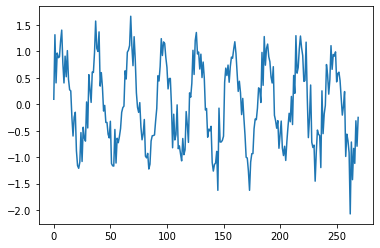

In [17]:
df['value'].plot()